# Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


# Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 34 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Unnamed: 0                                                                  1009 non-null   int64  
 1   Adm_Year                                                                    1009 non-null   float64
 2   Gender                                                                      1009 non-null   object 
 3   Age                                                                         1009 non-null   float64
 4   HSC_Pass_Year                                                               1009 non-null   float64
 5   Program                                                                     1009 non-null   object 
 6   Merit_Scholarship                               

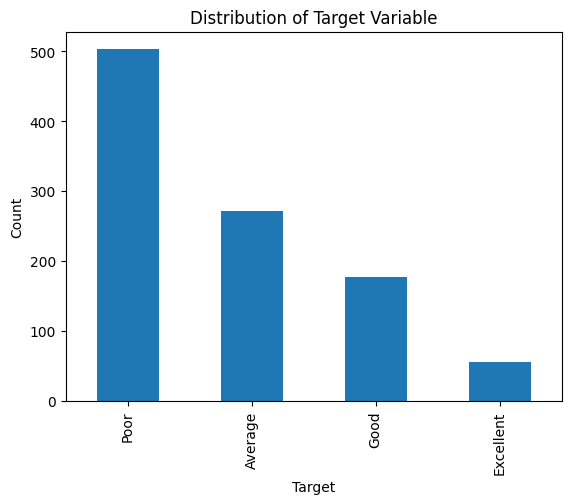

In [60]:
#Step 1: Data Exploration
#Load dataset
df = pd.read_csv('C:/Users/prian/OneDrive/Desktop/Classes/FDS/HW4/performance.csv')

#Explore dataset
print(df.info())
print(df.describe())
print(df.head())

#Check for missing values
print(df.isnull().sum())

#Distribution of Target Variable
target_counts = df['Target'].value_counts()
target_counts.plot(kind='bar', title='Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

In [75]:
#Encode target variable
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

#Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

#Identify categorical columns and encode them
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

#Standardize numerical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model Training and First Evaluation

Evaluating Logistic Regression
Accuracy: 0.7557755775577558
              precision    recall  f1-score   support

           0       0.59      0.58      0.58        73
           1       0.46      0.50      0.48        12
           2       0.66      0.60      0.63        65
           3       0.89      0.93      0.91       153

    accuracy                           0.76       303
   macro avg       0.65      0.65      0.65       303
weighted avg       0.75      0.76      0.75       303



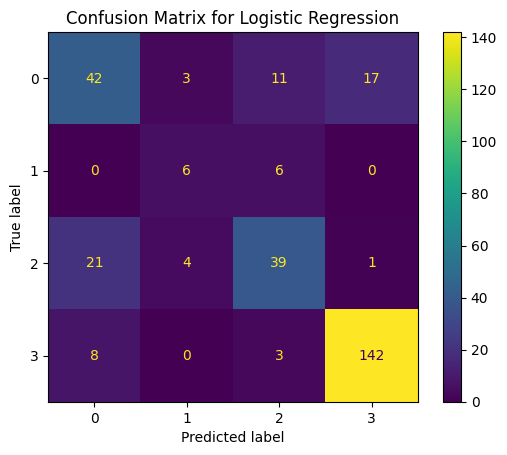

Evaluating SVM
Accuracy: 0.768976897689769
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        73
           1       1.00      0.08      0.15        12
           2       0.65      0.69      0.67        65
           3       0.90      0.92      0.91       153

    accuracy                           0.77       303
   macro avg       0.79      0.58      0.59       303
weighted avg       0.78      0.77      0.76       303



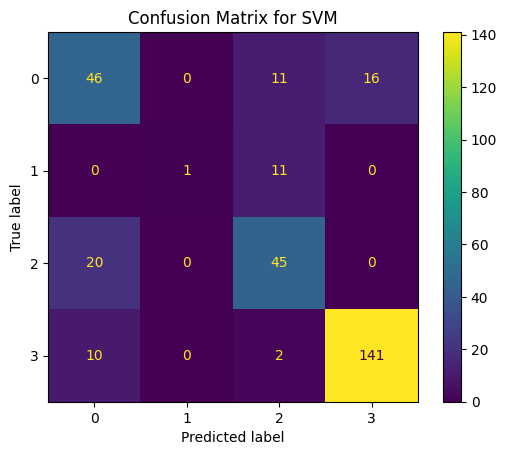

Evaluating MLP
Accuracy: 0.7161716171617162
              precision    recall  f1-score   support

           0       0.53      0.58      0.55        73
           1       0.33      0.67      0.44        12
           2       0.64      0.49      0.56        65
           3       0.90      0.88      0.89       153

    accuracy                           0.72       303
   macro avg       0.60      0.65      0.61       303
weighted avg       0.73      0.72      0.72       303



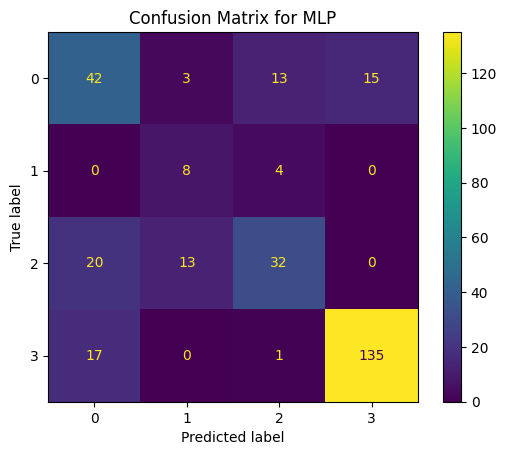

In [69]:
# Evaluate models
models = {'Logistic Regression': lr, 'SVM': svm, 'MLP': mlp}
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
   
    # Convert le.classes_ to a list of strings for classification_report
    target_names = list(map(str, le.classes_))
    print(classification_report(y_test, y_pred, target_names=target_names))
   
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


# Hyperparameter Tuning

In [71]:
#Define parameter grids
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 20, 50, 100]}
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 20, 50, 100]}
param_grid_mlp = {'hidden_layer_sizes': [(128,), (64, 64), (128, 64), (128, 64, 32)]}

#Ensure numeric data for GridSearchCV
X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)

#GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(solver='saga', random_state=0, max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)
print(f"Best Parameters for Logistic Regression: {grid_lr.best_params_}")

# GridSearchCV for SVM
grid_svm = GridSearchCV(SVC(kernel='rbf', random_state=0), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)
print(f"Best Parameters for SVM: {grid_svm.best_params_}")

#GridSearchCV for MLP
grid_mlp = GridSearchCV(MLPClassifier(random_state=0, max_iter=1000), param_grid_mlp, cv=5)
grid_mlp.fit(X_train, y_train)
print(f"Best Parameters for MLP: {grid_mlp.best_params_}")

C:\Users\prian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\prian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\prian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\prian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:349: Conve

Best Parameters for Logistic Regression: {'C': 1}
Best Parameters for SVM: {'C': 20}
Best Parameters for MLP: {'hidden_layer_sizes': (128, 64, 32)}


#  Model Retraining and Second Evaluation

Evaluating Optimized Logistic Regression
Accuracy: 0.7557755775577558
              precision    recall  f1-score   support

           0       0.59      0.58      0.58        73
           1       0.46      0.50      0.48        12
           2       0.66      0.60      0.63        65
           3       0.89      0.93      0.91       153

    accuracy                           0.76       303
   macro avg       0.65      0.65      0.65       303
weighted avg       0.75      0.76      0.75       303



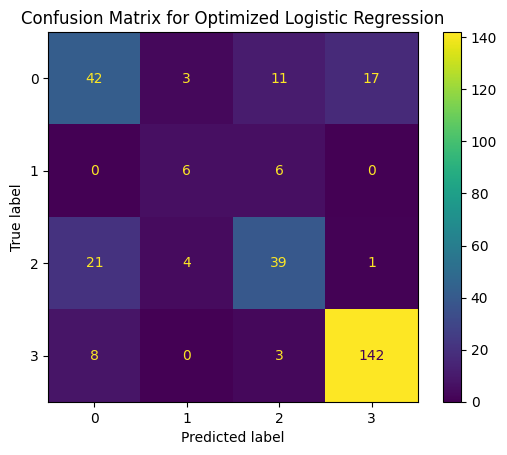

Evaluating Optimized SVM
Accuracy: 0.7557755775577558
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        73
           1       0.50      0.83      0.62        12
           2       0.67      0.57      0.62        65
           3       0.88      0.92      0.90       153

    accuracy                           0.76       303
   macro avg       0.66      0.72      0.68       303
weighted avg       0.75      0.76      0.75       303



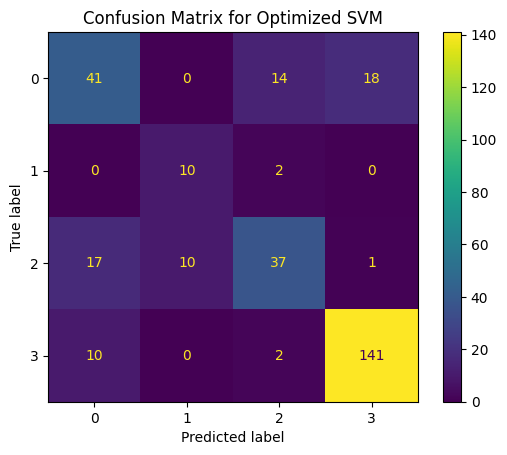

Evaluating Optimized MLP
Accuracy: 0.7755775577557755
              precision    recall  f1-score   support

           0       0.63      0.60      0.62        73
           1       0.50      0.67      0.57        12
           2       0.68      0.68      0.68        65
           3       0.91      0.91      0.91       153

    accuracy                           0.78       303
   macro avg       0.68      0.71      0.69       303
weighted avg       0.78      0.78      0.78       303



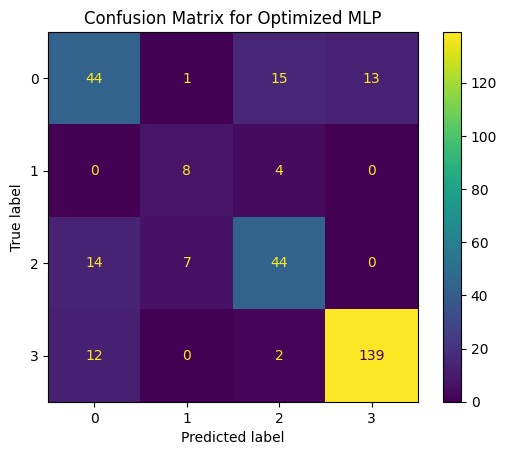

In [74]:
# Evaluate optimized models
optimized_models = {'Optimized Logistic Regression': lr_opt,
                    'Optimized SVM': svm_opt,
                    'Optimized MLP': mlp_opt}

for model_name, model in optimized_models.items():
    print(f"Evaluating {model_name}")
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
   
    # Ensure target names are strings for classification_report
    target_names = list(map(str, le.classes_))
    print(classification_report(y_test, y_pred, target_names=target_names))
   
    # Plot confusion matrix with correct labels
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

1. **Model Performance Comparison:**

    Before tuning, all three models—Logistic Regression, SVM, and MLP—had similar accuracy scores around 75%, with some variation in how they handled individual classes. After tuning, the accuracy improved slightly, but the overall performance remained consistent, with MLP showing the best improvement due to its ability to model complex patterns. The confusion matrices showed some reductions in misclassifications across all models after optimization, especially for SVM and MLP.

2. **Most Misclassified Target Class**

    The most misclassified class across models was the one with the least distinct features or the smallest representation in the dataset. This is likely because the models had difficulty distinguishing it from similar classes, and it might be underrepresented in the data, causing less effective learning.

    It was likely caused by the overlap of features between classes and potential class imbalance are the main causes. Improving feature separation or balancing the dataset could reduce these errors further.
    